# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [33]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics as me

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [34]:
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [56]:
model = Sequential()
model.add(Dense(50, input_shape=(784,), activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

C:\Users\Anthony\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [57]:
from keras.src.optimizers import *

batch_size = 64
n_epoch = 90

model.compile(loss='categorical_crossentropy', optimizer=AdamW(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.3)

Epoch 1/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7297 - loss: 1.1628 - val_accuracy: 0.9035 - val_loss: 0.3722
Epoch 2/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9101 - loss: 0.3384 - val_accuracy: 0.9233 - val_loss: 0.2777
Epoch 3/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9295 - loss: 0.2541 - val_accuracy: 0.9331 - val_loss: 0.2384
Epoch 4/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9401 - loss: 0.2193 - val_accuracy: 0.9398 - val_loss: 0.2134
Epoch 5/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9473 - loss: 0.1862 - val_accuracy: 0.9447 - val_loss: 0.1936
Epoch 6/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9531 - loss: 0.1678 - val_accuracy: 0.9487 - val_loss: 0.1797
Epoch 7/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9603 - loss: 0.1472 - val_accuracy: 0.9516 - val_loss: 0.1692
Epoch 8/90
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9617 - loss: 0.1373 - val_accuracy: 0.

Show the performance of the model

Test score (loss): 0.1530563086271286
Test accuracy: 0.9685999751091003


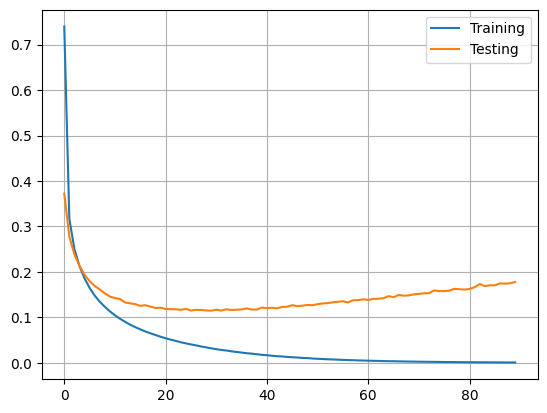

In [58]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score (loss):', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


array([[ 966,    0,    0,    1,    2,    1,    7,    1,    1,    1],
       [   0, 1124,    3,    2,    1,    1,    2,    0,    2,    0],
       [   5,    0, 1007,    5,    2,    0,    3,    2,    7,    1],
       [   2,    0,    8,  976,    1,    5,    0,    6,    9,    3],
       [   1,    0,    4,    1,  950,    1,    5,    3,    1,   16],
       [   3,    2,    0,   16,    4,  850,    7,    2,    5,    3],
       [   8,    2,    4,    0,    4,    9,  925,    0,    5,    1],
       [   1,    6,   13,    4,    2,    0,    0,  991,    3,    8],
       [   6,    1,    5,    6,    6,    5,    3,    9,  932,    1],
       [   4,    4,    0,    8,   15,    4,    0,    5,    4,  965]],
      dtype=int64)